# Let is improve the control filter - selecting controls and targets



In [3]:
import pandas as pd
import numpy as np
import re 

In [2]:
pd.set_option('display.max_rows', 20)


df_final = pd.read_csv(r'/Users/gfrosi/Documents/Frosi_lab_jacques/Chip-Seq-GSMs-To-Work/final_df_to_work_42022samples.csv')





In [6]:
df_final.shape

(42022, 11)

In [8]:
#Trying to improve the control samples classification
#In the last tests, we tried to filter using two columns (title, source-cell) and just title column.
#The difference between these two tests were 144 samples


list_categories = []


patterns = [r"\bcontrol\b",r"\binput\b",r"[-_]?(input)[_-]?", r"[-_]?(Control)[_-]?", 
            r"\bctrl\b", r"[-_]?(ctrl)[_-]?", r"\bctl\b", r"[-_]?(ctl)[_-]?"]

compiled_combined = re.compile('|'.join(x for x in patterns), re.IGNORECASE)


for index, row in df_final.iterrows():
    if re.search(compiled_combined, row['Title']) or re.search(compiled_combined, row['source-cell']):
#         print(row['Title'] ,"::", row['source-cell'])
        list_categories.append('Control')
        

    else:       
#         print(row['Title'])
        list_categories.append('Trait')
    
        
       
        
print(len(list_categories))   





42022


In [9]:
list_categories.count('Control')

7911

In [10]:
GSE_control_list = []
GSE_trait_list = []

for index, row in df_final.iterrows():
    if 'Control'in row['Categories']:
#         print(row['Title'])
        GSE_control_list.append(row['GSE'])
        

    else:       
#         print(row['Title'])
        GSE_trait_list.append(row['GSE'])

In [15]:
print(len(GSE_control_list))
print(len(GSE_trait_list))

7911
34111


In [73]:
#setting the control and traits lists


#here we have GSE that have just control and control + traits samples
set_gse_control = set(GSE_control_list)

#here we have GSE that have just traits and control + traits samples
set_gse_trait = set(GSE_trait_list)

#so is necessary to get the difference between them to get the unique GSE (just with controls, just with traits)

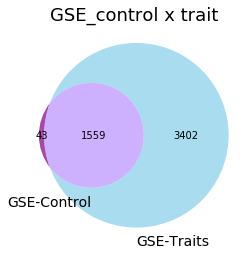

<Figure size 576x432 with 0 Axes>

In [66]:
#GSE Venn Diagram 

from matplotlib_venn import venn2
import matplotlib.pyplot as plt 
import seaborn as sns


# set_gse_control = set(GSE_control_list)
# set_gse_trait = set(GSE_trait_list)


##Checked
# print(len(set_gse_control))
# print(len(set_gse_trait))

venn_GSE_ctrl_trt = venn2([set_gse_control, set_gse_trait], set_labels = ('GSE-Control', 'GSE-Traits'), 
                                        set_colors=('purple', 'skyblue'), alpha = 0.7)


for text in venn_GSE_ctrl_trt.set_labels:
    text.set_fontsize(14)
# for text in venn_gsm_ngs_geodb_NCBI_chip.subset_labels:
#     text.set_fontsize(12)


plt.title('GSE_control x trait', fontsize=18)
plt.figure(figsize=(8,6))


plt.show()


# Control unique GSE - checking 

In [18]:
#just control series
#Getting the 43 GSE-control unique list and check manually 

control_unique_set = set_gse_control.difference(set_gse_trait)
control_unique_list = list(control_unique_set)

#Several GSEs here are related with Encode project. The encode project has series just with controls, and another
##with just trait samples (deposited in different series) - it is a issue that we need to see how to work...connect
##these series

#GSE61487 - 1 input, 4 samples (the problem is in source column - human control NPCs, where actualy just 
#one sample is the input - title information)

#GSE89728 - here we have just one input related to chip-seq. This series has 22 samples, but with another 
##sequencing method

#GSE60269 - 98 samples, but just one is related to human (control)

#GSE79563 - 7 samples, but just 3 are chip-seq (and inputs). The another samples are chip-exo

#GSE69183 - 18 samples, but just 10 are chip-seq. From these 10, just 2 are inputs, but the source cell 
##columns contains "control" (Neuroblastoma SK-N-SH control cells, untreated)

#GSE132426 - we have 2 samples (controls), and another 20 traits samples for this same experiment are inserted in 
##)GSE132430

#GSE135127 - 6 samples, where 2 in fact are control (inputs). The problem is the abbreviation Ctrl. This abbreviation 
## is inserted in the trait samples title! So here we have false positive controls. This series should be inserted in 
##control+traits

#GSE30902 - 4 samples (1 control and 3 traits). But the traits are not included in our final table because they do not
##have the SRX ID to download the samples. Just the control sample has this ID. 


#control_unique_list

In [32]:
#checking GSE string contains control list - description above

df_final[df_final['GSE'].str.contains('GSE136487', case=False)]

,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories,Categories_v2
765,Control ChIP-seq from HepG2 (ENCLB810FPW),NaN,Homo sapiens,Homo sapiens HepG2 cell line,GSE136487,GSM4051042,ChIP-Seq,Control,HepG2,Control,Control
766,Control ChIP-seq from HepG2 (ENCLB242FBS),NaN,Homo sapiens,Homo sapiens HepG2 cell line,GSE136487,GSM4051043,ChIP-Seq,Control,HepG2,Control,Control


# Traits unique GSE - to check randomly 

In [45]:
#list unique traits GSE 
traits_unique_set = set_gse_trait.difference(set_gse_control)
traits_unique_list = list(traits_unique_set)



In [47]:
#Ok - 3402

print(len(traits_unique_list))

3402


In [51]:
#Check the false positives related to ctl regex

#We can filter (count) how many samples/series has regex(ENCL) (done below)
#See the IgG case....

traits_unique_list

#GSE91325 - 3 samples (ENCODE) - in this case, the controls are inserted in another series, but the experiment has
##controls and traits (we just need to figure out how to compile this series, and then they will be inserted in 
##intersection)

#GSE92483 - 3 samples, and one has IgG in the title (and om their description in NCBI there is a term IgG control)

#GSE86685 - Encode case
#We have a lot of encode series with one our two samples...but their controls are inserted in another series...

#GSE126990 - 4 samples, no controls


['GSE91325',
 'GSE86685',
 'GSE92483',
 'GSE92043',
 'GSE91872',
 'GSE139693',
 'GSE91231',
 'GSE105664',
 'GSE126990',
 'GSE105279',
 'GSE105303',
 'GSE127623',
 'GSE91597',
 'GSE71422',
 'GSE136500',
 'GSE105646',
 'GSE127693',
 'GSE86940',
 'GSE128398',
 'GSE19465',
 'GSE91437',
 'GSE101069',
 'GSE106872',
 'GSE94209',
 'GSE23701',
 'GSE91971',
 'GSE57258',
 'GSE95881',
 'GSE105389',
 'GSE80037',
 'GSE105241',
 'GSE91627',
 'GSE105463',
 'GSE105340',
 'GSE105947',
 'GSE95893',
 'GSE91475',
 'GSE105875',
 'GSE91907',
 'GSE105873',
 'GSE91567',
 'GSE91356',
 'GSE106036',
 'GSE105356',
 'GSE96003',
 'GSE68356',
 'GSE105364',
 'GSE86665',
 'GSE91576',
 'GSE95959',
 'GSE101066',
 'GSE96429',
 'GSE98849',
 'GSE92109',
 'GSE92221',
 'GSE85081',
 'GSE120142',
 'GSE96317',
 'GSE96187',
 'GSE96010',
 'GSE96514',
 'GSE53646',
 'GSE56279',
 'GSE85057',
 'GSE105592',
 'GSE124748',
 'GSE91271',
 'GSE94227',
 'GSE91275',
 'GSE91882',
 'GSE105899',
 'GSE127620',
 'GSE101236',
 'GSE106045',
 'GSE127

In [105]:
#checking some series

#df_final[df_final['GSE'].str.contains('GSE71422', case=False)]

# ENCODE samples

In [106]:
#ENCODE df

df_encode = df_final[df_final['Title'].str.contains('(ENCLB)', case=False)].reset_index(drop=True)
#df_encode

/Users/gfrosi/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [166]:
df_encode.fillna("None", inplace=True)

In [168]:
#Trying to see a link between the control encode series with the trait series 


# df_encode[df_encode['Title'].str.contains('K562', case=False)]


In [ ]:
#number of control samples 

df_encode[df_encode['Categories_v2'].str.contains('Control')]

In [59]:
#checking how many GSE has just traits and control samples for encode samples/series

GSE_control_encode = []
GSE_trait_encode = []

for index, row in df_encode.iterrows():
    if 'Control'in row['Categories']:
#         print(row['Title'])
        GSE_control_encode.append(row['GSE'])
        

    else:       
#         print(row['Title'])
        GSE_trait_encode.append(row['GSE'])


In [62]:
#We have 73 control control samples and 4976 traits samples related to encode


print(len(GSE_trait_encode))
print(len(GSE_control_encode))

4976
73


In [63]:
#setting the encode lists (GSE)

set_gse_control_encode = set(GSE_control_encode)
set_gse_trait_encode = set(GSE_trait_encode)

In [178]:

print(len(set_gse_control_encode))
print(len(set_gse_trait_encode))


33
2709


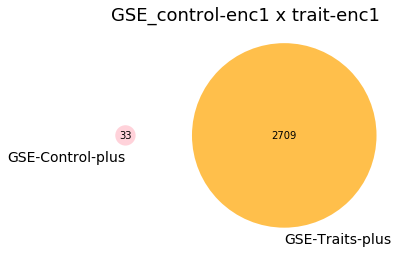

<Figure size 576x432 with 0 Axes>

In [179]:
#Venn Diagram ENCODE 1 (title and source-cell)

#GSE Venn Diagram 

from matplotlib_venn import venn2
import matplotlib.pyplot as plt 
import seaborn as sns



venn_GSE_ctrl_trt_enc_1 = venn2([set_gse_control_encode, set_gse_trait_encode], set_labels = ('GSE-Control-plus', 'GSE-Traits-plus'), 
                                        set_colors=('pink', 'orange'), alpha = 0.7)


for text in venn_GSE_ctrl_trt_enc_1.set_labels:
    text.set_fontsize(14)


plt.title('GSE_control-enc1 x trait-enc1', fontsize=18)
plt.figure(figsize=(8,6))


plt.show()



In [82]:
#converting the set control to list to compare bellow 

list_test_control = list(set_gse_control_encode)

In [86]:
#difference between control and traits sets (it is not necessary here, we do not have series with both - control and traits)
######I tested!


#control
# control_encode_unique_set = set_gse_control_encode.difference(set_gse_trait_encode)
# control_encode_unique_list = list(control_encode_unique_set)

#checking if the set before veen diagram is equal to the list generated by difference after venn diagram 
#is not necessary to get the difference between sets. The set is already with the GSEs that have just control and 
##just samples

list_test_control.sort() == control_encode_unique_list.sort()



True

# Getting the difference between general and encode list for control and traits

In [85]:
#We need to get the difference between the lists from df_final for control_GSE and trait_GSE and encode lists. 
#For example, we have 43 GSE with just control samples, but 33 are the encode experiments. 
#Traits: from 3402 series with just traits, 2709 are encode






In [103]:
#print len diffs CONTROLS (title and source-cell minus encode) 

####converting the set_encode in case of necessity


### set_gse_control_encode_list = list(set_gse_control_encode)
### set_gse_trait_encode_list = list(set_gse_trait_encode)

#10 samples
set_diff_control = control_unique_set.difference(set_gse_control_encode)
print(len(set_diff_control))

#693 samples
set_diff_trait = traits_unique_set.difference(set_gse_trait_encode)
print(len(set_diff_trait))



10
693


In [104]:
###############We need to check if this control series (specially ENCODE) cover all traits series as their controls.

##Let is check the another series (10 no encode)
set_diff_control

##GSE31363 - ENCODE (we have ENCODE full word)

#GSE132426 - we have 2 samples (controls), and another 20 traits samples for this same experiment are inserted in 
## another series - GSE132430

#GSE135127 - 6 samples, where 2 in fact are control (inputs). The problem is the abbreviation Ctrl. This abbreviation 
## is inserted in the trait samples title! So here we have false positive controls. This series should be inserted in 
##control+traits

#GSE30902 - 4 samples (1 control and 3 traits). But the traits are not included in our final table because they do not
##have the SRX ID to download the samples. Just the control sample has this ID. 

##GSE59692 - just inputs 

##GSE60269 - 3 organisms, 98 samples, but just one is related to human 

#GSE61487 - 1 input, 4 samples (the problem is in source column - human control NPCs, where actualy just 
#one sample is the input - title information)

#GSE69183 - 18 samples, but just 10 are chip-seq. From these 10, just 2 are inputs, but the source cell 
##columns contains "control" (Neuroblastoma SK-N-SH control cells, untreated)

#GSE79563 - 7 samples, but just 3 are chip-seq (and inputs). The another samples are chip-exo

#GSE89728 - here we have just one input related to chip-seq. This series has 22 samples, but with another 
##sequencing method


{'GSE132426',
 'GSE135127',
 'GSE30902',
 'GSE31363',
 'GSE59692',
 'GSE60269',
 'GSE61487',
 'GSE69183',
 'GSE79563',
 'GSE89728'}

In [107]:
#TRAITS no encode - 693

####Trying to figure out another queries for control 

set_diff_trait

###examples
#GSE100257 - just time series





{'GSE100257',
 'GSE100347',
 'GSE100381',
 'GSE100400',
 'GSE100889',
 'GSE101063',
 'GSE101148',
 'GSE101408',
 'GSE101553',
 'GSE102004',
 'GSE102395',
 'GSE102474',
 'GSE102702',
 'GSE102761',
 'GSE103175',
 'GSE103187',
 'GSE103215',
 'GSE103255',
 'GSE103449',
 'GSE103728',
 'GSE103734',
 'GSE103947',
 'GSE104149',
 'GSE104227',
 'GSE104261',
 'GSE104638',
 'GSE104676',
 'GSE104755',
 'GSE104800',
 'GSE104921',
 'GSE105028',
 'GSE105037',
 'GSE105038',
 'GSE105446',
 'GSE105795',
 'GSE106552',
 'GSE106666',
 'GSE106844',
 'GSE106872',
 'GSE107320',
 'GSE107553',
 'GSE107580',
 'GSE107584',
 'GSE107609',
 'GSE107738',
 'GSE107975',
 'GSE108144',
 'GSE108179',
 'GSE108205',
 'GSE108265',
 'GSE108323',
 'GSE108704',
 'GSE108773',
 'GSE108833',
 'GSE109103',
 'GSE109221',
 'GSE109229',
 'GSE109310',
 'GSE109438',
 'GSE109481',
 'GSE109652',
 'GSE109653',
 'GSE109690',
 'GSE109706',
 'GSE109884',
 'GSE110448',
 'GSE110453',
 'GSE110473',
 'GSE110566',
 'GSE110681',
 'GSE110761',
 'GSE1

In [110]:
df_final[df_final['GSE'].str.contains('GSE100400', case=False)]

,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories,Categories_v2
5317,human hepatocytes (HepG2.2.15) Pol2,NaN,Homo sapiens,human hepatocytes (HepG2.2.15),GSE100400,GSM2680323,ChIP-Seq,Pol2,NaN,Trait,Trait
5318,human hepatocytes (HepG2 H1.3) Pol2,NaN,Homo sapiens,human hepatocytes (HepG2 H1.3),GSE100400,GSM2680324,ChIP-Seq,Pol2,NaN,Trait,Trait
5319,human hepatocytes (HepaRG) Pol2,NaN,Homo sapiens,human hepatocytes (HepaRG),GSE100400,GSM2680325,ChIP-Seq,Pol2,NaN,Trait,Trait
5320,human hepatocytes (HepG2.2.15) HBx,NaN,Homo sapiens,human hepatocytes (HepG2.2.15),GSE100400,GSM2680326,ChIP-Seq,HBx,NaN,Trait,Trait
5321,human hepatocytes (HepG2 H1.3) HBx,NaN,Homo sapiens,human hepatocytes (HepG2 H1.3),GSE100400,GSM2680327,ChIP-Seq,HBx,NaN,Trait,Trait
5322,human hepatocytes (HepaRG) HBx,NaN,Homo sapiens,human hepatocytes (HepaRG),GSE100400,GSM2680328,ChIP-Seq,HBx,NaN,Trait,Trait
5323,human hepatocytes (HepG2.2.15) H3K36me3,NaN,Homo sapiens,human hepatocytes (HepG2.2.15),GSE100400,GSM2680329,ChIP-Seq,H3K36me3,NaN,Trait,Trait
5324,human hepatocytes (HepG2 H1.3) H3K36me3,NaN,Homo sapiens,human hepatocytes (HepG2 H1.3),GSE100400,GSM2680330,ChIP-Seq,H3K36me3,NaN,Trait,Trait
5325,human hepatocytes (HepaRG) H3K36me3,NaN,Homo sapiens,human hepatocytes (HepaRG),GSE100400,GSM2680331,ChIP-Seq,H3K36me3,NaN,Trait,Trait
5326,human hepatocytes (HepG2.2.15) H3K4me3,NaN,Homo sapiens,human hepatocytes (HepG2.2.15),GSE100400,GSM2680332,ChIP-Seq,H3K4me3,NaN,Trait,Trait


In [130]:
df_final.columns

Index(['Title', 'cell type', 'organism', 'source-cell', 'GSE', 'GSM',
       'Library', 'Target-antibody', 'Cell line', 'Categories',
       'Categories_v2'],
      dtype='object')

# Filtering (again) the data frame - target antibody

In [138]:
#First: fill nan values by none (string) to avoid to get the error: expected string or bytes-like object


df_final.fillna('None', inplace=True)



In [139]:
#Trying to improve the control samples classification
#In the last tests, we tried to filter using two columns (title, source-cell) and just title column.
#The difference between these two tests were 144 samples


list_categories_plus = []


patterns = [r"\bcontrol\b",r"\binput\b",r"[-_]?(input)[_-]?", r"[-_]?(Control)[_-]?", 
            r"\bctrl\b", r"[-_]?(ctrl)[_-]?", r"\bctl\b", r"[-_]?(ctl)[_-]?"]

compiled_combined = re.compile('|'.join(x for x in patterns), re.IGNORECASE)


#filtering using title, source-cell and target-antibody columns
for index, row in df_final.iterrows():
    if re.search(compiled_combined, row['Title']) or re.search(compiled_combined, row['source-cell']) or re.search(compiled_combined, row['Target-antibody']):
#         print(row['Title'] ,"::", row['source-cell'])
        list_categories_plus.append('Control')
        

    else:       
#         print(row['Title'])
        list_categories_plus.append('Trait')
    
        
       
        
print(len(list_categories_plus))   




42022


In [143]:
#Creating a new column Categories_v3 that included the target antibody 

df_final["Categories_v3"] = list_categories_plus


In [145]:
#list control and traits after include the target antibody column
#after create a def for this code 


GSE_control_plus = []
GSE_trait_plus = []

for index, row in df_final.iterrows():
    if 'Control'in row['Categories_v3']:
#         print(row['Title'])
        GSE_control_plus.append(row['GSE'])
        

    else:       
#         print(row['Title'])
        GSE_trait_plus.append(row['GSE'])


In [147]:
#target antibody add
print(len(GSE_control_plus))
print(len(GSE_trait_plus))

#just title and source name
print(len(GSE_control_list))
print(len(GSE_trait_list))

8752
33270
7911
34111


In [149]:
#setting the list_plus (with target)

#here we have GSE that have just control and control + traits samples
set_gse_control_plus = set(GSE_control_plus)

#here we have GSE that have just traits and control + traits samples
set_gse_trait_plus = set(GSE_trait_plus)

#so is necessary to get the difference between them to get the unique GSE (just with controls, just with traits)

control_unique_set_plus = set_gse_control_plus.difference(set_gse_trait_plus)
control_unique_list_plus = list(control_unique_set_plus)

traits_unique_set_plus = set_gse_trait_plus.difference(set_gse_control_plus)
traits_unique_list_plus = list(traits_unique_set_plus)




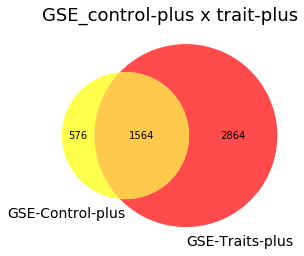

<Figure size 576x432 with 0 Axes>

In [154]:
#Venn Diagram 

#GSE Venn Diagram 

from matplotlib_venn import venn2
import matplotlib.pyplot as plt 
import seaborn as sns



venn_GSE_ctrl_trt_plus = venn2([set_gse_control_plus, set_gse_trait_plus], set_labels = ('GSE-Control-plus', 'GSE-Traits-plus'), 
                                        set_colors=('yellow', 'red'), alpha = 0.7)


for text in venn_GSE_ctrl_trt_plus.set_labels:
    text.set_fontsize(14)


plt.title('GSE_control-plus x trait-plus', fontsize=18)
plt.figure(figsize=(8,6))


plt.show()



In [151]:
#title and source 
print(len(control_unique_list))
print(len(traits_unique_list))

#add target_antibody
print(len(control_unique_list_plus))
print(len(traits_unique_list_plus))



43
3402
576
2864


In [184]:
#Creating a df_control using the list created from fiterting title, source-cell and target antibody

df_final[df_final['GSE'].isin(control_unique_list_plus)]


,Title,cell type,organism,source-cell,GSE,GSM,Library,Target-antibody,Cell line,Categories,Categories_v2,Categories_v3
199,Control ChIP-seq from K562 (ENCLB403RJU),None,Homo sapiens,Homo sapiens K562 cell line,GSE136495,GSM4051080,ChIP-Seq,Control,K562,Control,Control,Control
200,Control ChIP-seq from K562 (ENCLB577DLO),None,Homo sapiens,Homo sapiens K562 cell line,GSE136495,GSM4051081,ChIP-Seq,Control,K562,Control,Control,Control
235,Control ChIP-seq from esophagus muscularis muc...,None,Homo sapiens,Homo sapiens male adult (37 years) esophagus m...,GSE136465,GSM4050896,ChIP-Seq,Control,None,Control,Control,Control
236,Control ChIP-seq from esophagus muscularis muc...,None,Homo sapiens,Homo sapiens male adult (37 years) esophagus m...,GSE136465,GSM4050897,ChIP-Seq,Control,None,Control,Control,Control
765,Control ChIP-seq from HepG2 (ENCLB810FPW),None,Homo sapiens,Homo sapiens HepG2 cell line,GSE136487,GSM4051042,ChIP-Seq,Control,HepG2,Control,Control,Control
...,...,...,...,...,...,...,...,...,...,...,...,...
41421,UChicago_ChipSeq_K562_Input_Control_eGFP-NR4A1,None,Homo sapiens,K562,GSE31363,GSM777645,ChIP-Seq,Input,None,Control,Control,Control
41422,UChicago_ChipSeq_K562_Input_Control_eGFP-FOS,None,Homo sapiens,K562,GSE31363,GSM777646,ChIP-Seq,Input,None,Control,Control,Control
41423,UChicago_ChipSeq_K562_Input_Control_eGFP-HDAC8,None,Homo sapiens,K562,GSE31363,GSM777647,ChIP-Seq,Input,None,Control,Control,Control
41424,UChicago_ChipSeq_K562_Input_Control_eGFP-GATA2,None,Homo sapiens,K562,GSE31363,GSM777648,ChIP-Seq,Input,None,Control,Control,Control


In [161]:
#DIFF between the first quantification (plus-target and title+source-cell)
#DIFF between title+source-cell and plut-target

#533 series more
set_diff_control_plus = control_unique_set_plus.difference(control_unique_set)
print(len(set_diff_control_plus))

#538 samples series less 
set_diff_trait_plus = traits_unique_set.difference(traits_unique_set_plus)
print(len(set_diff_trait_plus))



533
538


In [165]:
print(len(control_unique_set))
print(len(traits_unique_set))

print(len(set_gse_control_encode))
print(len(set_gse_trait_encode))

print(len(control_unique_set_plus))
print(len(traits_unique_set_plus))


43
3402
33
2709
576
2864


# Filtering the ENCODE table including the target column filter to control



In [170]:
#Encode plus target

#ENCODE df

df_encode_plus = df_final[df_final['Title'].str.contains('(ENCLB)', case=False)].reset_index(drop=True)
# df_encode_plus



In [201]:
#816 control samples
#df_encode_plus[df_encode_plus['Categories_v3'].str.contains('Control')]

In [174]:
#checking how many GSE has just traits and control samples for encode samples/series

GSE_control_encode_plus = []
GSE_trait_encode_plus = []

for index, row in df_encode_plus.iterrows():
    if 'Control'in row['Categories_v3']:
#         print(row['Title'])
        GSE_control_encode_plus.append(row['GSE'])
        

    else:       
#         print(row['Title'])
        GSE_trait_encode_plus.append(row['GSE'])


In [182]:
#We have xx control control samples and 4976 traits samples related to encode


print(len(GSE_control_encode_plus))
print(len(GSE_trait_encode_plus))


#setting the encode lists (GSE)

set_gse_control_encode_plus = set(GSE_control_encode_plus)
set_gse_trait_encode_plus = set(GSE_trait_encode_plus)

print(len(set_gse_control_encode_plus))
print(len(set_gse_trait_encode_plus))



816
4233
566
2176


In [180]:
# print(len(GSE_control_encode))
# print(len(GSE_trait_encode))

# print(len(set_gse_trait_encode))
# print(len(set_gse_control_encode))

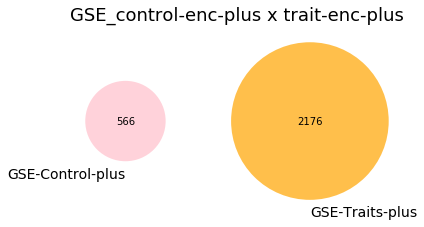

<Figure size 576x432 with 0 Axes>

In [181]:
#Venn Diagram ENCODE plus (title; source-cell and target)

#GSE Venn Diagram 

from matplotlib_venn import venn2
import matplotlib.pyplot as plt 
import seaborn as sns



venn_GSE_ctrl_trt_enc_plus = venn2([set_gse_control_encode_plus, set_gse_trait_encode_plus], set_labels = ('GSE-Control-plus', 'GSE-Traits-plus'), 
                                        set_colors=('pink', 'orange'), alpha = 0.7)


for text in venn_GSE_ctrl_trt_enc_plus.set_labels:
    text.set_fontsize(14)


plt.title('GSE_control-enc-plus x trait-enc-plus', fontsize=18)
plt.figure(figsize=(8,6))


plt.show()


In [209]:
#get the difference about the traits before and after target between general dataframe and encode dataframe
#then, check the series that dont have control included (to check if is a limitation of our regex)

#set_gse_trait_plus contains GSE just with traits and with control and traits at the same time. We need to get
##the set with the difference

set_GSE_nocontrol_noencode = traits_unique_set_plus.difference(set_gse_trait_encode_plus)

print(len(traits_unique_set_plus))
print(len(set_gse_trait_encode_plus))

print(len(set_GSE_nocontrol_noencode))


2864
2176
688


In [210]:
#Let's try to see some terms related to control samples in this series 

set_GSE_nocontrol_noencode




{'GSE100257',
 'GSE100347',
 'GSE100381',
 'GSE100400',
 'GSE100889',
 'GSE101063',
 'GSE101148',
 'GSE101408',
 'GSE101553',
 'GSE102004',
 'GSE102395',
 'GSE102474',
 'GSE102702',
 'GSE102761',
 'GSE103175',
 'GSE103187',
 'GSE103215',
 'GSE103255',
 'GSE103449',
 'GSE103728',
 'GSE103734',
 'GSE103947',
 'GSE104149',
 'GSE104227',
 'GSE104261',
 'GSE104638',
 'GSE104676',
 'GSE104755',
 'GSE104921',
 'GSE105028',
 'GSE105037',
 'GSE105038',
 'GSE105446',
 'GSE105795',
 'GSE106552',
 'GSE106666',
 'GSE106844',
 'GSE106872',
 'GSE107320',
 'GSE107553',
 'GSE107580',
 'GSE107584',
 'GSE107609',
 'GSE107738',
 'GSE107975',
 'GSE108144',
 'GSE108179',
 'GSE108205',
 'GSE108265',
 'GSE108323',
 'GSE108704',
 'GSE108773',
 'GSE108833',
 'GSE109103',
 'GSE109221',
 'GSE109229',
 'GSE109310',
 'GSE109438',
 'GSE109481',
 'GSE109652',
 'GSE109653',
 'GSE109690',
 'GSE109706',
 'GSE109884',
 'GSE110448',
 'GSE110453',
 'GSE110473',
 'GSE110566',
 'GSE110681',
 'GSE110761',
 'GSE111179',
 'GSE1

In [ ]:
#####trying to match encode controls with traits